In [1]:
# zuerst installiere ich Requests, BeautifulSoup und Pandas

import requests
from bs4 import BeautifulSoup
import pandas as pd

### Beispielseite scrapen

In [2]:
# die Seite transfermarkt.ch blockiert Anfragen, deshalb mit Barnabys Code die Blockade umgehen

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
url = 'https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id=2010'

r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text, 'html.parser')
soup


<!DOCTYPE html>

<!-- paulirish.com/2008/conditional-stylesheets-vs-css-hacks-answer-neither/ -->
<!--[if IE 7]>
<html class="ie7 oldie" lang="de"> <![endif]-->
<!--[if IE 8]>
<html class="no-js lt-ie9" lang="de"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="de"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="x-ua-compatible">
<meta content="telephone=no" name="format-detection">
<meta content="#1a3151" name="theme-color"/>
<link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon-16x16.png" rel="shortcut icon" sizes="16x16">
<link href="/android-chrome-192x192.png" rel="shortcut icon" sizes="192x192">
<link href="/apple-touch-icon-152x152.png" rel="apple-touch-icon-precomposed">
<link href="http://www.transfermarkt.de/super-league/startseite/wettbewerb/C1/saison_id/2010/plus/" hreflang="x-default" rel="alternate"/>
<link href="http://www.transfermarkt.de/super-league/startseite/wettbewerb/C1/saison_i

### Tabelle mit Marktwerten scrapen

In [3]:
# ich ziehe die Vereine raus, indem ich nach allen Elementen mit folgendem Pfad suche 

vereine = soup.find_all('td', {'class':'hauptlink no-border-links show-for-small show-for-pad'})


# ich baue eine for-Schleife, die mir alle Vereine ausspuckt

for team in vereine:
    print(team.text)

FC Basel
BSC Young Boys
FC Zürich
FC Sion
FC St. Gallen
Grasshoppers
FC Luzern
Neuchâtel Xamax
AC Bellinzona
FC Thun


In [4]:
# ich ziehe die Marktwerte der Vereine raus, indem ich nach allen Elementen mit folgendem Pfad suche

marktwerte = soup.find_all('td', {'class':'rechts show-for-small show-for-pad nowrap'})


# ich baue eine for-Schleife, die mir alle Marktwerte ausspuckt

for wert in marktwerte:
    print(wert.text)

182,78 Mio. €
577 Tsd. €
41,20 Mio. €
1,33 Mio. €
26,60 Mio. €
831 Tsd. €
23,25 Mio. €
705 Tsd. €
18,38 Mio. €
557 Tsd. €
16,45 Mio. €
548 Tsd. €
14,20 Mio. €
406 Tsd. €
14,05 Mio. €
413 Tsd. €
12,35 Mio. €
441 Tsd. €
8,35 Mio. €
309 Tsd. €
7,95 Mio. €
234 Tsd. €


In [5]:
# die ersten beiden Werte kann ich nicht brauchen, weil es Gesamtwerte der Liga sind > erst ab 3. Element [2:]
# ich brauche nur die Gesamtmarktwerte > jedes zweite Element überspringen [::2]
# ich will Kommazahlen (float), keine strings > ich ersetze 'Mio €' durch nichts und das Komma durch einen Punkt

for wert in marktwerte[2:][::2]:
    print(float(wert.text.replace(' Mio. €', '').replace(',', '.')))

41.2
26.6
23.25
18.38
16.45
14.2
14.05
12.35
8.35
7.95


In [6]:
# jetzt bringe ich Vereine und Marktwerte zusammen

teamwertliste = []
for team, wert in zip(vereine, marktwerte[2:][::2]):
    team = team.text
    wert = float(wert.text.replace(' Mio. €', '').replace(',', '.'))
    dictionary = {'Team': team,
                 'Wert': wert}
    
    teamwertliste.append(dictionary)
    
    
# ich erstelle mit Pandas ein Dataframe

pd.DataFrame(teamwertliste)

,Team,Wert
0,FC Basel,41.20
1,BSC Young Boys,26.60
2,FC Zürich,23.25
3,FC Sion,18.38
4,FC St. Gallen,16.45
5,Grasshoppers,14.20
6,FC Luzern,14.05
7,Neuchâtel Xamax,12.35
8,AC Bellinzona,8.35
9,FC Thun,7.95


In [7]:
# Diese Tabelle will ich nicht nur für die Saison 2017, sondern für mehrere Jahre > ich setze einen range fest

jahre = list(range(2010,2018))

# und passe die URL an, die ohne Jahresangabe bei allen gleich ist > id=...

url = "https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id="

In [8]:
# jetzt führe ich alles zusammen (und nehme beim dictionary noch das Jahr rein):

allejahre = []
jahre = list(range(2010,2018))
url = "https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id="

for jahr in jahre:
    url2 = (url+str(jahr))
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    r = requests.get(url2, headers=headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    vereine = soup.find_all('td', {'class':'hauptlink no-border-links show-for-small show-for-pad'})
    marktwerte = soup.find_all('td', {'class':'rechts show-for-small show-for-pad nowrap'})
           
    for team, wert in zip(vereine, marktwerte[2:][::2]):
        team = team.text
        wert = float(wert.text.replace(' Mio. €', '').replace(',', '.'))
        dictionary = {'Team': team,'Wert': wert,'Jahr': jahr}
    
        allejahre.append(dictionary)

In [10]:
# und erstelle mit Pandas eine neue Version des Dataframes mit allen Jahren

df_werte = pd.DataFrame(allejahre)
df_werte

,Jahr,Team,Wert
0,2010,FC Basel,41.20
1,2010,BSC Young Boys,26.60
2,2010,FC Zürich,23.25
3,2010,FC Sion,18.38
4,2010,FC St. Gallen,16.45
5,2010,Grasshoppers,14.20
6,2010,FC Luzern,14.05
7,2010,Neuchâtel Xamax,12.35
8,2010,AC Bellinzona,8.35
9,2010,FC Thun,7.95


### Tabelle mit Punkten scrapen

In [11]:
### jetzt das gleich noch für die Tabelle mit den Punkten

vereine2 = soup.find_all('td', {'class':'no-border-links hauptlink'})

for team2 in vereine2:
    print(team2.text)


BSC Young Boys 

FC Basel  

FC Luzern 

FC Zürich   

FC St. Gallen 

FC Sion 

FC Thun 

FC Lugano 

Grasshoppers 

Lausanne-Sport 


In [12]:
alle_tabellen = soup.find_all('div', {'class':'responsive-table'})
tabelle2 = alle_tabellen[1]
reihen = tabelle2.find_all('tr')

for reihe in reihen[1:]:
    alle_tds = reihe.find_all('td')
    punkte = alle_tds[-1]
    print(punkte.text)

84
69
54
49
45
42
42
42
39
35


In [13]:
reihen[1:][0].find_all('td')[-1].text

'84'

In [14]:
teampunkteliste = []
for team2, punkte in zip(vereine2, reihen[1:]):
    team2 = team2.text.replace("\n","")
    punkte = punkte.find_all('td')[-1].text
    dictionary = {'Team': team2,'Punkte': punkte}
    
    teampunkteliste.append(dictionary)

pd.DataFrame(teampunkteliste)

,Punkte,Team
0,84,BSC Young Boys
1,69,FC Basel
2,54,FC Luzern
3,49,FC Zürich
4,45,FC St. Gallen
5,42,FC Sion
6,42,FC Thun
7,42,FC Lugano
8,39,Grasshoppers
9,35,Lausanne-Sport


In [15]:
allejahre2 = []
jahre2 = list(range(2010,2018))
url = "https://www.transfermarkt.ch/super-league/startseite/wettbewerb/C1/plus/?saison_id="

for jahr in jahre2:
    url2 = (url+str(jahr))
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    r = requests.get(url2, headers=headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    vereine2 = soup.find_all('td', {'class':'no-border-links hauptlink'})
    reihen = soup.find_all('div', {'class':'responsive-table'})[1].find_all("tr")
           
    for team2, punkte in zip(vereine2, reihen[1:]):
        team2 = team2.text.replace("\n","")
        punkte = punkte.find_all('td')[-1].text
        dictionary2 = {'Team': team2,'Punkte': punkte,'Jahr': jahr}
    
        allejahre2.append(dictionary2)

In [16]:
df_punkte = pd.DataFrame(allejahre2)
df_punkte

,Jahr,Punkte,Team
0,2010,\n2,Super League Barrage-Spiele (bis 11/12)
1,2011,\n2,Super League Barrage-Spiele (bis 11/12)
2,2012,72,FC Basel
3,2012,69,Grasshoppers
4,2012,59,FC St. Gallen
5,2012,55,FC Zürich
6,2012,48,FC Thun
7,2012,48,FC Sion
8,2012,43,BSC Young Boys
9,2012,42,FC Luzern


### Tabellen mergen

In [23]:
# Vereinsnamen harmonisieren, damit die beiden Tabellen nachher zusammengeführt werden können

def harm(elem):
    if elem == 'FC Basel 1893':
        return 'FC Basel'
    if elem == 'Grasshopper Club Zürich':
        return 'Grasshoppers'
    if elem == 'FC St. Gallen 1879':
        return 'FC St. Gallen'
    else:
        return elem

In [24]:
df_punkte["Club"] = df_punkte['Team'].apply(harm)
df_punkte.head()

,Jahr,Punkte,Team,Club
0,2010,\n2,Super League Barrage-Spiele (bis 11/12),Super League Barrage-Spiele (bis 11/12)
1,2011,\n2,Super League Barrage-Spiele (bis 11/12),Super League Barrage-Spiele (bis 11/12)
2,2012,72,FC Basel,FC Basel
3,2012,69,Grasshoppers,Grasshoppers
4,2012,59,FC St. Gallen,FC St. Gallen


In [25]:
df_werte["Club"] = df_werte['Team'].apply(harm)
df_werte.head()

,Jahr,Team,Wert,Club
0,2010,FC Basel,41.20,FC Basel
1,2010,BSC Young Boys,26.60,BSC Young Boys
2,2010,FC Zürich,23.25,FC Zürich
3,2010,FC Sion,18.38,FC Sion
4,2010,FC St. Gallen,16.45,FC St. Gallen


In [44]:
# in beiden Tabellen eine neue Kolonne erstellen, die Club+Jahr beeinhaltet

df_werte["club_jahr"] = df_werte["Club"]+df_werte["Jahr"].map(str)
df_werte.head()

,Jahr,Team,Wert,Club,club_jahr
0,2010,FC Basel,41.20,FC Basel,FC Basel2010
1,2010,BSC Young Boys,26.60,BSC Young Boys,BSC Young Boys2010
2,2010,FC Zürich,23.25,FC Zürich,FC Zürich2010
3,2010,FC Sion,18.38,FC Sion,FC Sion2010
4,2010,FC St. Gallen,16.45,FC St. Gallen,FC St. Gallen2010


In [27]:
df_punkte["club_jahr"] = df_punkte["Club"]+df_punkte["Jahr"].map(str)
df_punkte.head()

,Jahr,Punkte,Team,Club,club_jahr
0,2010,\n2,Super League Barrage-Spiele (bis 11/12),Super League Barrage-Spiele (bis 11/12),Super League Barrage-Spiele (bis 11/12) 2010
1,2011,\n2,Super League Barrage-Spiele (bis 11/12),Super League Barrage-Spiele (bis 11/12),Super League Barrage-Spiele (bis 11/12) 2011
2,2012,72,FC Basel,FC Basel,FC Basel 2012
3,2012,69,Grasshoppers,Grasshoppers,Grasshoppers 2012
4,2012,59,FC St. Gallen,FC St. Gallen,FC St. Gallen 2012


In [31]:
# erste zwei Zeilen müssen hier bereinigt werden

df_punkte["Club"] = df_punkte["Club"].str.strip()
df_punkte["club_jahr"] = df_punkte["Club"]+df_punkte["Jahr"].map(str)
df_punkte.head()

,Jahr,Punkte,Team,Club,club_jahr
0,2010,\n2,Super League Barrage-Spiele (bis 11/12),Super League Barrage-Spiele (bis 11/12),Super League Barrage-Spiele (bis 11/12)2010
1,2011,\n2,Super League Barrage-Spiele (bis 11/12),Super League Barrage-Spiele (bis 11/12),Super League Barrage-Spiele (bis 11/12)2011
2,2012,72,FC Basel,FC Basel,FC Basel2012
3,2012,69,Grasshoppers,Grasshoppers,Grasshoppers2012
4,2012,59,FC St. Gallen,FC St. Gallen,FC St. Gallen2012


In [32]:
# anhand der neuen Spalte "club_jahr" kann ich die beiden Tabellen zusammenführen (mergen)

df = df_werte.merge(df_punkte, on="club_jahr")
df.head()

,Jahr_x,Team_x,Wert,Club_x,club_jahr,Jahr_y,Punkte,Team_y,Club_y
0,2012,FC Basel,39.25,FC Basel,FC Basel2012,2012,72,FC Basel,FC Basel
1,2012,BSC Young Boys,32.35,BSC Young Boys,BSC Young Boys2012,2012,43,BSC Young Boys,BSC Young Boys
2,2012,FC Sion,29.60,FC Sion,FC Sion2012,2012,48,FC Sion,FC Sion
3,2012,FC Luzern,18.20,FC Luzern,FC Luzern2012,2012,42,FC Luzern,FC Luzern
4,2012,FC Zürich,17.75,FC Zürich,FC Zürich2012,2012,55,FC Zürich,FC Zürich


### Finales DataFrame

In [35]:
# ich vereinfache mein DataFrame und nehme nur die Spalten, die ich brauche
df_final = df[["Jahr_x","Club_x","Wert","Punkte"]]

# ich benenne die Spalten neu
df_final.columns = ["Jahr","Club","Wert","Punkte"]
df_final.head()

,Jahr,Club,Wert,Punkte
0,2012,FC Basel,39.25,72
1,2012,BSC Young Boys,32.35,43
2,2012,FC Sion,29.60,48
3,2012,FC Luzern,18.20,42
4,2012,FC Zürich,17.75,55


In [36]:
df_final.dtypes

Jahr        int64
Club       object
Wert      float64
Punkte     object
dtype: object

In [38]:
# es erkennt die Punkte nicht als Zahl, sondern als String > deshalb bereinigen

df_final['Punkte'] = df_final['Punkte'].astype(int)
df_final.dtypes

/Users/yannick/.virtualenvs/virtuelle_umgebung/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Jahr        int64
Club       object
Wert      float64
Punkte      int64
dtype: object

In [40]:
df_final

,Jahr,Club,Wert,Punkte
0,2012,FC Basel,39.25,72
1,2012,BSC Young Boys,32.35,43
2,2012,FC Sion,29.60,48
3,2012,FC Luzern,18.20,42
4,2012,FC Zürich,17.75,55
5,2012,Grasshoppers,14.15,69
6,2012,Servette FC,11.40,26
7,2012,FC St. Gallen,10.35,59
8,2012,FC Thun,9.03,48
9,2012,Lausanne-Sport,8.50,33


In [80]:
# ich erstelle eine neue Spalte, die mir anzeigt, wieviel Geld ein Punkt "gekostet" hat
# dazu rechne ich den Marktwert durch die Punkte

df_final['Geld_pro_Punkt'] =  df_final['Wert'] / df_final['Punkte']
df_final.head(15)

/Users/yannick/.virtualenvs/virtuelle_umgebung/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Jahr,Club,Wert,Punkte,Geld_pro_Punkt
0,2012,FC Basel,39.25,72,0.545139
1,2012,BSC Young Boys,32.35,43,0.752326
2,2012,FC Sion,29.60,48,0.616667
3,2012,FC Luzern,18.20,42,0.433333
4,2012,FC Zürich,17.75,55,0.322727
5,2012,Grasshoppers,14.15,69,0.205072
6,2012,Servette FC,11.40,26,0.438462
7,2012,FC St. Gallen,10.35,59,0.175424
8,2012,FC Thun,9.03,48,0.188125
9,2012,Lausanne-Sport,8.50,33,0.257576


### Visualisierung

In [48]:
%matplotlib inline

In [46]:
# ich sortiere das Dataframe gemäss meiner neuen Spalte 'geld-pro-punkt'

# diese Teams haben in der jeweiligen Saison am meisten Geld pro Punkt ausgegeben:
df_final.sort_values('Geld_pro_Punkt', ascending=False).head(10)

,Jahr,Club,Wert,Punkte,Geld_pro_Punkt
10,2013,FC Basel,67.83,72,0.942083
50,2017,FC Basel,59.93,69,0.868551
51,2017,FC Sion,36.35,42,0.865476
33,2015,FC Zürich,28.38,34,0.834706
40,2016,FC Basel,67.70,86,0.787209
1,2012,BSC Young Boys,32.35,43,0.752326
42,2016,FC Sion,37.88,51,0.742745
43,2016,Grasshoppers,27.93,38,0.735000
30,2015,FC Basel,57.90,83,0.697590
32,2015,FC Sion,32.60,50,0.652000


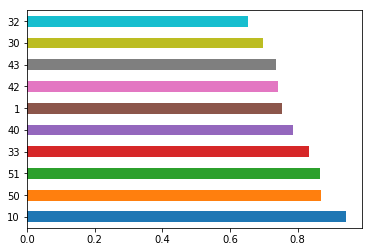

In [92]:
df_final['Geld_pro_Punkt'].sort_values(ascending=False).head(10).plot(kind='barh')

In [47]:
# diese Teams haben am wenigsten Geld pro Punkt ausgegeben, also am meisten aus ihren Mögl. gemacht:
df_final.sort_values('Geld_pro_Punkt').head(10)

,Jahr,Club,Wert,Punkte,Geld_pro_Punkt
7,2012,FC St. Gallen,10.35,59,0.175424
8,2012,FC Thun,9.03,48,0.188125
5,2012,Grasshoppers,14.15,69,0.205072
19,2013,FC Thun,10.43,48,0.217292
28,2014,FC Thun,12.00,52,0.230769
47,2016,FC Thun,11.45,45,0.254444
9,2012,Lausanne-Sport,8.50,33,0.257576
29,2014,FC Vaduz,8.03,31,0.259032
46,2016,FC Lugano,14.10,53,0.266038
18,2013,FC Aarau,11.40,42,0.271429


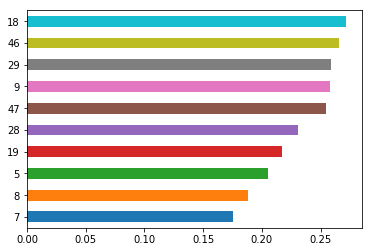

In [89]:
df_final['Geld_pro_Punkt'].sort_values().head(10).plot(kind='barh')

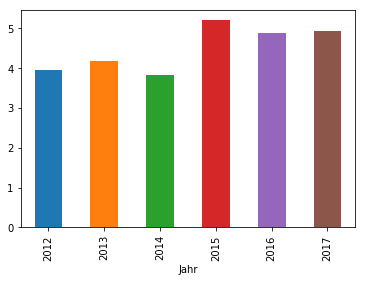

In [81]:
# so haben sich die Ausgaben in der Super League über die Jahre entwickelt:
df_final.groupby('Jahr')['Geld_pro_Punkt'].sum().plot(kind='bar')

Jahr
2012    AxesSubplot(0.125,0.125;0.775x0.755)
2013    AxesSubplot(0.125,0.125;0.775x0.755)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Geld_pro_Punkt, dtype: object

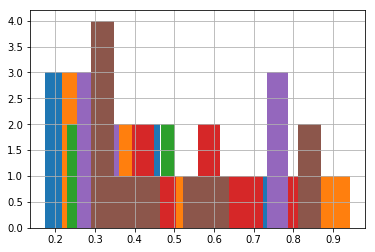

In [84]:
df_final.groupby('Jahr')['Geld_pro_Punkt'].hist()

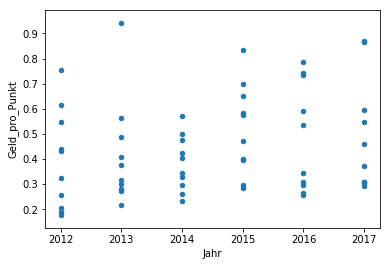

In [71]:
df_final.plot(kind='scatter', x='Jahr', y='Geld_pro_Punkt')

/Users/yannick/.virtualenvs/virtuelle_umgebung/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


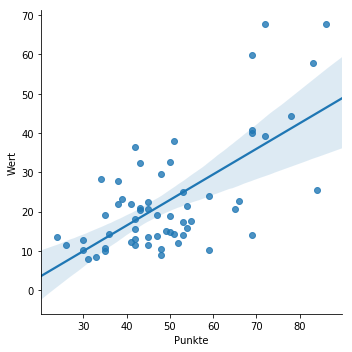

In [93]:
# tendenziell gitl: umso höher der Marktwert eines Teams, desto mehr Punkte holt es
# siehe Regression

import seaborn as sns
sns.lmplot(x="Punkte", y="Wert", data=df_result);